# 1.环境安装和关联

先安装openmmlab基本库

In [ ]:
!pip3 install install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

In [ ]:
!pip install openmim
!mim install 'mmengine'

mmcv和cuda还是分开安装比较好，会去这里检索有没有相应的版本：

<Looking in links: https://download.openmmlab.com/mmcv/dist/cu113/torch1.11.0/index.html>

In [ ]:
# !mim install "mmcv==2.0.0"
# 有时候这个程序比较傻逼，明明有相应的wheel，但是还是去走编译。。就直接自己下载好，本地安装就好了
# 自己去上面那个网页，找对应的版本去安装就可以了
!wget https://download.openmmlab.com/mmcv/dist/cu113/torch1.11.0/mmcv-2.0.0-cp310-cp310-manylinux1_x86_64.whl
!pip install mmcv-2.0.0-cp310-cp310-manylinux1_x86_64.whl

In [8]:
# 检查 Pytorch
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

Pytorch 版本 1.11.0+cu113
CUDA 是否可用 True
MMCV版本 2.0.0
CUDA版本 11.3
编译器版本 GCC 9.3


针对不同任务，安装具体的库

In [ ]:
!pip install opencv-python pillow matplotlib seaborn tqdm pytorch-lightning 'mmdet>=3.0.0rc1' -i https://pypi.tuna.tsinghua.edu.cn/simple


In [ ]:
!rm -rf mmsegmentation
!git clone https://github.com/open-mmlab/mmsegmentation.git -b dev-1.x
!cd /content/mmsegmentation && pip install -v -e .

In [ ]:
# !pip uninstall "mmsegmentation" --yes
!pip install "mmsegmentation>=1.0.0"

关联google云

In [12]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# 2.准备数据

## 2.1 下载解压数据集

In [13]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip

--2023-06-19 09:38:30--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20230130-mmseg/dataset/watermelon/Watermelon87_Semantic_Seg_Mask.zip
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13230222 (13M) [application/zip]
Saving to: ‘Watermelon87_Semantic_Seg_Mask.zip’

Watermelon87_Semant 100%[===================>]  12.62M  4.78MB/s    in 2.6s    

2023-06-19 09:38:34 (4.78 MB/s) - ‘Watermelon87_Semantic_Seg_Mask.zip’ saved [13230222/13230222]



In [ ]:
!unzip Watermelon87_Semantic_Seg_Mask.zip -d /content
# !rm -rf Dubai-dataset.zip

In [ ]:
# !sudo apt-get install tree && cd Watermelon87_Semantic_Seg_Mask && tree -L 3 --filelimit=10
# !cd Watermelon87_Semantic_Seg_Mask && tree -L 3 --filelimit=10
!tree -L 3 --filelimit=10

解压后的文件结构：
```bash
├── Watermelon87_Semantic_Seg_Mask
│   ├── ann_dir
│   │   ├── train
            ├── XX.png
│   │   └── val
│   └── img_dir
│       ├── train
            ├── XX.jpg
│       └── val
```

删除多余文件，比如MACOS的 '__MACOSX','.DS_Store'和jupyterlab生成的ipynb_checkpoints'

In [ ]:
# 查看是否有这些多余文件（其实只看数据集文件夹里有没有就行，没有就不用管了）
!find . -iname '__MACOSX'
!find . -iname '.DS_Store'
!find . -iname '.ipynb_checkpoints'

./drive/MyDrive/OpenMMLab/workdir/.ipynb_checkpoints
./drive/MyDrive/OpenMMLab/Exercise_2/outputs/.ipynb_checkpoints
./drive/MyDrive/OpenMMLab/Exercise_2/.ipynb_checkpoints
./drive/MyDrive/OpenMMLab/Exercise_3/.ipynb_checkpoints
./drive/MyDrive/OpenMMLab/Exercise_5/dreambooth/.ipynb_checkpoints


In [ ]:
# 有则删除
!for i in `find . -iname '__MACOSX'`; do rm -rf $i;done
!for i in `find . -iname '.DS_Store'`; do rm -rf $i;done
!for i in `find . -iname '.ipynb_checkpoints'`; do rm -rf $i;done

删除完可以再执行一遍find，看是否删除干净了

## 2.2 数据可视化

### 2.2.1 单张

In [ ]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# file_name = "8-thuc-pham-chong-cam-cum-1459496975020"
file_name = "045_sozai_l"
img_path = f'/content/Watermelon87_Semantic_Seg_Mask/img_dir/train/{file_name}.jpg'
mask_path = f'/content/Watermelon87_Semantic_Seg_Mask/ann_dir/train/{file_name}.png'
print(img_path,'\n',mask_path)

/content/Watermelon87_Semantic_Seg_Mask/img_dir/train/045_sozai_l.jpg 
 /content/Watermelon87_Semantic_Seg_Mask/ann_dir/train/045_sozai_l.png


In [ ]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)

# 高，宽，通道数
img_height, img_width, img_channel = img.shape
mask_height, mask_width, mask_channel = mask.shape
print(f"img_height={img_height}, img_width={img_width},img_channel={img_channel}")

img_height=300, img_width=440,img_channel=3


正常mask应该是单通道，这里在处理标签文件保存的时候可能有些问题

为了显示出这个mask，考虑自定义一个cmap

| 类别名称     | 类别语义      | 标注类别               | 灰度图像素值 |
| ----------- | ------------ | --------------------- | ------------ |
| /           | 背景         | /                     | 0            |
| red         | 西瓜红瓤     | 多段线（polygon）       | 1            |
| green       | 西瓜外壳     | 多段线（polygon）       | 2            |
| white       | 西瓜白皮     | 多段线（polygon）       | 3            |
| seed-black  | 西瓜黑籽     | 多段线（polygon）       | 4            |
| seed-white  | 西瓜白籽     | 多段线（polygon）       | 5            |

其实imshow里还有vmin和vmax可以限制要显示的值的范围，详见：<https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html>

In [ ]:
watermalon_cmap = matplotlib.colors.ListedColormap(["tab:blue", "tab:red","tab:green","white","black","white"],N=6)

In [ ]:
from matplotlib import colors
# print(colors.to_rgb("tab:blue"))
# orange_rgb = colors.hex2color(colors.cnames["black"])
for colorName in ["tab:blue", "tab:red","tab:green","white","black","white"]:
  color_rgb = tuple([int(c*255) for c in colors.to_rgb(colorName)])
  print(color_rgb)

(31, 119, 180)
(214, 39, 40)
(44, 160, 44)
(255, 255, 255)
(0, 0, 0)
(255, 255, 255)


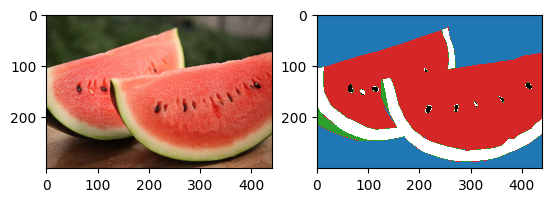

In [ ]:
plt.subplot(1,2,1)
plt.imshow(img[:,:,::-1])
plt.subplot(1,2,2)
# 只显示单通道，同时值的范围不是0-255，没有normalize，只有0和5
plt.imshow(mask[:,:,0],cmap=watermalon_cmap)

注意：
```python
file_name = "8-thuc-pham-chong-cam-cum-1459496975020"
```
这张图，标错了。。(西瓜皮白色和西瓜壳绿色反了，黑色也错了，颜色不对应)


In [ ]:
np.unique(mask) # 查看一下mask的值的类别，是不是符合西瓜的0-5的值

array([0, 1, 2, 3, 4, 5], dtype=uint8)

In [ ]:
plt.imshow(mask[:,:,0]) #直接走cmap默认值的显示效果

还是我设置之后的西瓜好看，哈哈哈

与原图进行叠加显示（类似标注软件那样的效果），显示效果。。一般，感觉傻傻分不清了

In [ ]:
plt.imshow(img[:,:,::-1])
plt.imshow(mask[:,:,0], alpha=0.5,cmap=watermalon_cmap) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.show()

### 2.2.2 批量

In [ ]:
img_base_dir = "/content/Watermelon87_Semantic_Seg_Mask/img_dir/train/"
mask_base_dir = "/content/Watermelon87_Semantic_Seg_Mask/ann_dir/train/"

sample_list = os.listdir(img_base_dir)

n =5
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(sample_list[:n**2]):
    # 载入图像和标注
    img_path = os.path.join(img_base_dir, file_name)
    mask_path = os.path.join(mask_base_dir, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)

    # 可视化
    axes[i//n, i%n].imshow(img[:,:,::-1])
    axes[i//n, i%n].imshow(mask[:,:,0], alpha=opacity,cmap=watermalon_cmap)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()

前25个西瓜里好几个西瓜子颜色都不是黑的，这个数据集质量堪忧啊

# 3.代码逻辑

## 3.0 注册相应数据集

根据：
+ <https://mmsegmentation.readthedocs.io/en/main/advanced_guides/add_datasets.html>,
+ <https://mmsegmentation.readthedocs.io/en/latest/advanced_guides/datasets.html>

好像确实需要自己另外注册一个数据集类型。。。

但是其实就是定义一个
```python
METAINFO = dict(
    classes=('tabBlue', 'red', 'green', 'white',
              'seed-black', 'seed-white'),
    # rgb format
    palette=[[31, 119, 180], [214, 39, 40], [44, 160, 44], [255, 255, 255],
              [0, 0, 0], [255, 255, 255]])
```
之前在其他教程里，例如：`penMMLabCampusLearn/Exercise_3
/rtmdet-tiny_1xb12-40e_balloon.py`。其实定义这个，加到数据集里配置里就行，不需要再搞个文件出来啊

尝试了一下，不行，这里必须要有个type。。。

在本地改好`__init__.py`和`WatermelonDataset.py`，上传到对应位置去

好像还有别的方式，参考：<https://mmengine.readthedocs.io/en/latest/advanced_tutorials/config.html#import-the-custom-module>

这种不是持久化的（不会把自定义模块保存成文件），就是运行时使用

In [ ]:
from mmseg.datasets.basesegdataset import BaseSegDataset
from mmseg.registry import DATASETS
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei', 'Songti SC', 'STFangsong']
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 8


@DATASETS.register_module()
class WatermelonDataset(BaseSegDataset):
    """Cityscapes dataset.

    The ``img_suffix`` is fixed to '_leftImg8bit.png' and ``seg_map_suffix`` is
    fixed to '_gtFine_labelTrainIds.png' for Cityscapes dataset.
    """
    METAINFO = dict(
        # 背景类，unlabeled ID=0的类，好像要放在最后？？？
        classes=('red', 'green', 'white','seed-black', 'seed-white','tabBlue'),
        # rgb format
        palette=[[214, 39, 40], [44, 160, 44], [255, 255, 255],[0, 0, 0],
         [255, 255, 255],[31, 119, 180],])

    def __init__(self,
                 img_suffix='.jpg',
                 seg_map_suffix='.png',
                 reduce_zero_label=False,
                 **kwargs) -> None:
        super().__init__(
            img_suffix=img_suffix,
            seg_map_suffix=seg_map_suffix,
            reduce_zero_label=reduce_zero_label,
            **kwargs)

KeyError: ignored

**文件持久化使用**

可以直接用程序编辑文本文件保存到相应位置，也可以提前编辑好，然后存到对应位置

In [23]:
watermelon = """
from .basesegdataset import BaseSegDataset
from mmseg.registry import DATASETS
@DATASETS.register_module()
class WatermelonDataset(BaseSegDataset):
    METAINFO = dict(
        classes=('red', 'green', 'white',
                 'seed-black', 'seed-white', 'tabBlue'),
        palette=[[214, 39, 40], [44, 160, 44], [255, 255, 255],
                 [0, 0, 0], [255, 255, 255], [31, 119, 180]])

    def __init__(self,
                 img_suffix='.jpg',
                 seg_map_suffix='.png',
                 reduce_zero_label=False,
                 **kwargs) -> None:
        super().__init__(
            img_suffix=img_suffix,
            seg_map_suffix=seg_map_suffix,
            reduce_zero_label=reduce_zero_label,
            **kwargs)
"""
watermelon_save_path = "/content/mmsegmentation/mmseg/datasets/watermelon.py"
with open(watermelon_save_path,'w') as f:
  f.write(watermelon)

In [24]:
initModified = """
# Copyright (c) OpenMMLab. All rights reserved.
# yapf: disable
from .watermelon import WatermelonDataset
from .ade import ADE20KDataset
from .basesegdataset import BaseSegDataset
from .chase_db1 import ChaseDB1Dataset
from .cityscapes import CityscapesDataset
from .coco_stuff import COCOStuffDataset
from .dark_zurich import DarkZurichDataset
from .dataset_wrappers import MultiImageMixDataset
from .decathlon import DecathlonDataset
from .drive import DRIVEDataset
from .hrf import HRFDataset
from .isaid import iSAIDDataset
from .isprs import ISPRSDataset
from .lip import LIPDataset
from .loveda import LoveDADataset
from .mapillary import MapillaryDataset_v1, MapillaryDataset_v2
from .night_driving import NightDrivingDataset
from .pascal_context import PascalContextDataset, PascalContextDataset59
from .potsdam import PotsdamDataset
from .refuge import REFUGEDataset
from .stare import STAREDataset
from .synapse import SynapseDataset
# yapf: disable
from .transforms import (CLAHE, AdjustGamma, BioMedical3DPad,
                         BioMedical3DRandomCrop, BioMedical3DRandomFlip,
                         BioMedicalGaussianBlur, BioMedicalGaussianNoise,
                         BioMedicalRandomGamma, GenerateEdge, LoadAnnotations,
                         LoadBiomedicalAnnotation, LoadBiomedicalData,
                         LoadBiomedicalImageFromFile, LoadImageFromNDArray,
                         PackSegInputs, PhotoMetricDistortion, RandomCrop,
                         RandomCutOut, RandomMosaic, RandomRotate,
                         RandomRotFlip, Rerange, ResizeShortestEdge,
                         ResizeToMultiple, RGB2Gray, SegRescale)
from .voc import PascalVOCDataset

# yapf: enable
__all__ = [
    'BaseSegDataset', 'BioMedical3DRandomCrop', 'BioMedical3DRandomFlip',
    'CityscapesDataset', 'PascalVOCDataset', 'ADE20KDataset',
    'PascalContextDataset', 'PascalContextDataset59', 'ChaseDB1Dataset',
    'DRIVEDataset', 'HRFDataset', 'STAREDataset', 'DarkZurichDataset',
    'NightDrivingDataset', 'COCOStuffDataset', 'LoveDADataset',
    'MultiImageMixDataset', 'iSAIDDataset', 'ISPRSDataset', 'PotsdamDataset',
    'LoadAnnotations', 'RandomCrop', 'SegRescale', 'PhotoMetricDistortion',
    'RandomRotate', 'AdjustGamma', 'CLAHE', 'Rerange', 'RGB2Gray',
    'RandomCutOut', 'RandomMosaic', 'PackSegInputs', 'ResizeToMultiple',
    'LoadImageFromNDArray', 'LoadBiomedicalImageFromFile',
    'LoadBiomedicalAnnotation', 'LoadBiomedicalData', 'GenerateEdge',
    'DecathlonDataset', 'LIPDataset', 'ResizeShortestEdge',
    'BioMedicalGaussianNoise', 'BioMedicalGaussianBlur',
    'BioMedicalRandomGamma', 'BioMedical3DPad', 'RandomRotFlip',
    'SynapseDataset', 'REFUGEDataset', 'MapillaryDataset_v1',
    'MapillaryDataset_v2', 'WatermelonDataset'
]

"""
init_path = "/content/mmsegmentation/mmseg/datasets/__init__.py"
with open(init_path,'w') as f:
  f.write(initModified)

## 3.1 预训练模型

+ 要求训练 PSPNet 语义分割算法，因此下载PSPNet网络的预训练模型
+ 在<https://github.com/open-mmlab/mmsegmentation/tree/master/configs/pspnet>
+ 找一个比较小的网络，西瓜语义分割，不需要街景那么复杂那么大的图像

这个比较合适：

|Method|	Backbone|	Crop Size|	Lr schd	|Mem (GB)	|Inf time (fps)	|mIoU|	mIoU(ms+flip)|	config|	download
|---|---|---|---|---|---|---|---|---|---|
|PSPNet|	R-18-D8|	512x512	|80000|	1.50	|85.12|	77.09|	78.30|

1.5GB，mIOu 77，针对的图像是512x512

+ 模型权重：<https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r18-d8_4x4_512x512_80k_potsdam/pspnet_r18-d8_4x4_512x512_80k_potsdam_20211220_125612-7cd046e1.pth>
+ 对应的配置文件：<https://github.com/open-mmlab/mmsegmentation/blob/master/configs/pspnet/pspnet_r18-d8_4x4_512x512_80k_potsdam.py>

In [ ]:
!wget https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r18-d8_4x4_512x512_80k_potsdam/pspnet_r18-d8_4x4_512x512_80k_potsdam_20211220_125612-7cd046e1.pth \
-P /content/drive/MyDrive/OpenMMLab/Exercise_4/checkpoint/


--2023-06-18 07:43:34--  https://download.openmmlab.com/mmsegmentation/v0.5/pspnet/pspnet_r18-d8_4x4_512x512_80k_potsdam/pspnet_r18-d8_4x4_512x512_80k_potsdam_20211220_125612-7cd046e1.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 163.181.82.212, 163.181.82.216, 163.181.82.214, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|163.181.82.212|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51266747 (49M) [application/octet-stream]
Saving to: ‘/content/drive/MyDrive/OpenMMLab/Exercise_4/checkpoint/pspnet_r18-d8_4x4_512x512_80k_potsdam_20211220_125612-7cd046e1.pth’

pspnet_r18-d8_4x4_5 100%[===================>]  48.89M  60.5MB/s    in 0.8s    

2023-06-18 07:43:35 (60.5 MB/s) - ‘/content/drive/MyDrive/OpenMMLab/Exercise_4/checkpoint/pspnet_r18-d8_4x4_512x512_80k_potsdam_20211220_125612-7cd046e1.pth’ saved [51266747/51266747]



## 3.2 config配置文件

基于上面现有的config进行修改

In [ ]:
from mmengine import Config
raw_config_path ="/content/mmsegmentation/configs/pspnet/pspnet_r18-d8_4xb4-80k_potsdam-512x512.py"
cfg = Config.fromfile(raw_config_path)

In [ ]:
print(cfg.pretty_text)

运行时修改，最后保存成.py文件使用脚本进行训练

In [ ]:
cfg.norm_cfg = dict(type='BN', requires_grad=True) # 只使用GPU时，BN取代SyncBN
# cfg.crop_size = (256, 256)
# cfg.model.data_preprocessor.size = cfg.crop_size
cfg.model.backbone.norm_cfg = cfg.norm_cfg
cfg.model.decode_head.norm_cfg = cfg.norm_cfg
cfg.model.auxiliary_head.norm_cfg = cfg.norm_cfg
# modify num classes of the model in decode/auxiliary head

# 模型 decode/auxiliary 输出头，指定为类别个数
cfg.model.decode_head.num_classes = 6
cfg.model.auxiliary_head.num_classes = 6

cfg.train_dataloader.batch_size = 8

cfg.train_dataloader.dataset.type='WatermelonDataset'
cfg.val_dataloader.dataset.type='WatermelonDataset'
cfg.test_dataloader.dataset.type='WatermelonDataset'

cfg.train_dataloader.dataset.data_root='/content/Watermelon87_Semantic_Seg_Mask'
cfg.val_dataloader.dataset.data_root='/content/Watermelon87_Semantic_Seg_Mask'
cfg.test_dataloader.dataset.data_root='/content/Watermelon87_Semantic_Seg_Mask'

cfg.test_dataloader = cfg.val_dataloader

# 结果保存目录
cfg.work_dir = '/content/drive/MyDrive/OpenMMLab/workdir/PSPNet'

# 训练迭代次数
cfg.train_cfg.max_iters = 1000
# 评估模型间隔
cfg.train_cfg.val_interval = 20
# 日志记录间隔
cfg.default_hooks.logger.interval = 10
# 模型权重保存间隔
cfg.default_hooks.checkpoint.interval = 100

# 随机数种子
cfg['randomness'] = dict(seed=0)

In [ ]:
# 查看完整的配置文件（包括继承的）
print(cfg.pretty_text)

In [ ]:
# 保存配置文件
config_file_path = '/content/drive/MyDrive/OpenMMLab/Exercise_4/pspnet-watermelon_20230618.py'
cfg.dump(config_file_path)

有些复杂的还是直接从config文件改吧，用代码改好慢。。。

## 3.3 训练

第一次用mmengin的API训练，没用命令行脚本

In [ ]:
from mmengine import Config

config_file_path = '/content/drive/MyDrive/OpenMMLab/Exercise_4/pspnet-watermelon_20230618.py'
cfg = Config.fromfile(config_file_path)

In [ ]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)
runner = Runner.from_cfg(cfg)

06/18 10:04:55 - mmengine - INFO - 
------------------------------------------------------------
System environment:
    sys.platform: linux
    Python: 3.10.12 (main, Jun  7 2023, 12:45:35) [GCC 9.4.0]
    CUDA available: True
    numpy_random_seed: 0
    GPU 0: Tesla T4
    CUDA_HOME: /usr/local/cuda
    NVCC: Cuda compilation tools, release 11.8, V11.8.89
    GCC: x86_64-linux-gnu-gcc (Ubuntu 9.4.0-1ubuntu1~20.04.1) 9.4.0
    PyTorch: 1.11.0+cu113
    PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - C++ Version: 201402
  - Intel(R) Math Kernel Library Version 2020.0.0 Product Build 20191122 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v2.5.2 (Git Hash a9302535553c73243c632ad3c4c80beec3d19a1e)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - LAPACK is enabled (usually provided by MKL)
  - NNPACK is enabled
  - CPU capability usage: AVX2
  - CUDA Runtime 11.3
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-

/usr/local/lib/python3.10/dist-packages/mmseg/models/backbones/resnet.py:431: UserWarning: DeprecationWarning: pretrained is a deprecated, please use "init_cfg" instead
  warnings.warn('DeprecationWarning: pretrained is a deprecated, '
/usr/local/lib/python3.10/dist-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/usr/local/lib/python3.10/dist-packages/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


06/18 10:05:00 - mmengine - INFO - Distributed training is not used, all SyncBatchNorm (SyncBN) layers in the model will be automatically reverted to BatchNormXd layers if they are used.
06/18 10:05:00 - mmengine - INFO - Hooks will be executed in the following order:
before_run:
(VERY_HIGH   ) RuntimeInfoHook                    
(BELOW_NORMAL) LoggerHook                         
 -------------------- 
before_train:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(VERY_LOW    ) CheckpointHook                     
 -------------------- 
before_train_epoch:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
(NORMAL      ) DistSamplerSeedHook                
 -------------------- 
before_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                    
(NORMAL      ) IterTimerHook                      
 -------------------- 
after_train_iter:
(VERY_HIGH   ) RuntimeInfoHook                

/usr/local/lib/python3.10/dist-packages/mmseg/engine/hooks/visualization_hook.py:61: UserWarning: The draw is False, it means that the hook for visualization will not take effect. The results will NOT be visualized or stored.
  warnings.warn('The draw is False, it means that the '


```python
runner.train()
```
报错：
```bash
KeyError: "class `IterBasedTrainLoop` in mmengine/runner/loops.py:
'WatermelonDataset is not in the dataset registry.
Please check whether the value of `WatermelonDataset` is correct or it was registered as expected.
More details can be found at
https://mmengine.readthedocs.io/en/latest/advanced_tutorials/config.html#import-the-custom-module'"
```

这是因为目前内存里的mmseg是pip install的，不是git安装的，所以其实自己定义的这个数据集引入的库看不见。。。

直接在运行时定义西瓜数据类并注册就可以了，见上面

In [ ]:
runner.train()

/usr/local/lib/python3.10/dist-packages/mmseg/datasets/transforms/loading.py:78: UserWarning: `reduce_zero_label` will be deprecated, if you would like to ignore the zero label, please set `reduce_zero_label=True` when dataset initialized
  warnings.warn('`reduce_zero_label` will be deprecated, '
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/18 10:05:07 - mmengine - WARNING - The prefix is not set in metric class IoUMetric.
06/18 10:05:08 - mmengine - INFO - load model from: open-mmlab://resnet18_v1c
06/18 10:05:08 - mmengine - INFO - Loads checkpoint by openmmlab backend from path: open-mmlab://resnet18_v1c
06/18 10:05:08 - mmengine - WARNING - The model and loaded state dict do not match exactly

unexpected key in source state_dict: fc.weight, fc.bias

06/18 10:05:08 - mmengine - WARNING - "FileClient" will be deprecated in future. Please use io functions in https://mmengine.readthedocs.io/en/latest/api/fileio.html#file-io
06/18 10:05:08 - mmengine - WARNING - "HardDiskBackend" is the alias of "LocalBackend" and the former will be deprecated in future.
06/18 10:05:08 - mmengine - INFO - Checkpoints will be saved to /content/drive/MyDrive/OpenMMLab/workdir/PSPNet.
06/18 10:05:17 - mmengine - INFO - Exp name: pspnet-watermelon_20230618_20230618_100453
06/18 10:05:17 - mmengine - INFO - Iter(train) [   6/1000]  lr: 9.999

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


06/18 10:05:33 - mmengine - INFO - Iter(val) [10/11]    eta: 0:00:00  time: 0.5953  data_time: 0.1298  memory: 8535  
06/18 10:05:33 - mmengine - INFO - per class results:
06/18 10:05:33 - mmengine - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
|    red     |  58.3 |  64.9 |
|   green    | 47.47 | 98.81 |
|   white    |  0.0  |  0.0  |
| seed-black |  0.0  |  0.0  |
| seed-white |  0.0  |  0.0  |
|  tabBlue   |  0.0  |  0.0  |
+------------+-------+-------+
06/18 10:05:33 - mmengine - INFO - Iter(val) [11/11]    aAcc: 64.5500  mIoU: 17.6300  mAcc: 27.2800  data_time: 0.1204  time: 0.5457
06/18 10:05:40 - mmengine - INFO - Iter(train) [  30/1000]  lr: 9.9968e-03  eta: 0:13:55  time: 0.7248  data_time: 0.0268  memory: 2773  loss: 0.9304  decode.loss_ce: 0.6003  decode.acc_seg: 78.1845  aux.loss_ce: 0.3301  aux.acc_seg: 46.8731
06/18 10:05:48 - mmengine - INFO - Iter(train) [  40/1000]  lr: 9.9957e-03  eta: 0:13:19  time: 0.7470  dat

EncoderDecoder(
  (data_preprocessor): SegDataPreProcessor()
  (backbone): ResNetV1c(
    (stem): Sequential(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
      (6): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (7): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (8): ReLU(inplace=True)
    )
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNor

执行期间报错：
```bash
FileNotFoundError: [Errno 2] No such file or directory:
'/content/Watermelon87_Semantic_Seg_Mask/ann_dir/train/21746.1.png'

FileNotFoundError: [Errno 2] No such file or directory:
'/content/Watermelon87_Semantic_Seg_Mask/ann_dir/val/01bd15599c606aa801201794e1fa30.png@1280w_1l_2o_100sh.png'
```
+ 去`ann_dir/train/`目录里，把`21746.png`变成`21746.1.png`
+ `01bd15599c606aa801201794e1fa30.png@1280w_1l_2o_100sh.png'`太长了，把对应的img（jpg改了）

注意：
+ mmseg好像是在 `runner = Runner.from_cfg(cfg)`期间就读入数据文件夹了，
+ 所以不仅要重新执行`runner.train()`，上面的其实也要重新跑


**观察**
+ 另外，观察到分割的这6个类别，不是一次性训练的，一开始只有几个类别有Iou，后面`white`和`seed-white`才逐渐有Iou值。。
+ 和boundingbox大小有关？？
+ 最后一类，放背景类（Unlabled类，ID=0）,这个规定确实很奇怪

## 3.4 推理

直接沿用训练时候的cfg和runner（这个runner好像没啥用啊）

In [ ]:
from mmseg.apis import init_model, inference_model, show_result_pyplot

checkpoint_path = '/content/drive/MyDrive/OpenMMLab/workdir/PSPNet/iter_1000.pth'
model = init_model(cfg, checkpoint_path, 'cuda:0')

/usr/local/lib/python3.10/dist-packages/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/usr/local/lib/python3.10/dist-packages/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: /content/drive/MyDrive/OpenMMLab/workdir/PSPNet/iter_1000.pth


如果按照之前数据集设置的内容，只有`.jpg`格式的图像，那其实`.jpeg`格式的图像应该是没有处理的吧。。

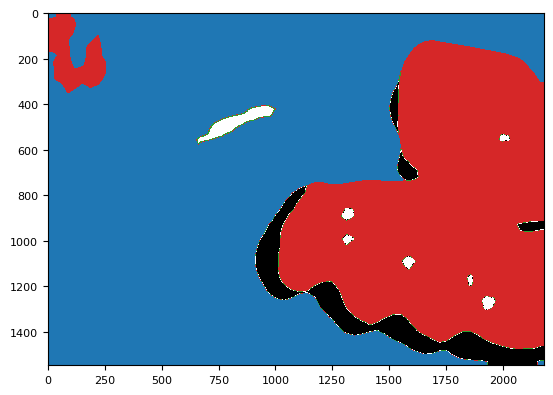

In [ ]:
import cv2
val_single_path = '/content/drive/MyDrive/OpenMMLab/Exercise_4/test_watermelon.jpg'
img = cv2.imread(val_single_path)
result = inference_model(model, img)
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()
plt.imshow(pred_mask,cmap=watermalon_cmap)

分析推理结果

In [ ]:
result.keys()

['pred_sem_seg', 'seg_logits']

In [ ]:
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()

In [ ]:
pred_mask.shape

(266, 474)

In [ ]:
import numpy as np
np.unique(pred_mask)

array([0, 1, 2, 3, 4])

## 3.5 对比预测和val真值结果

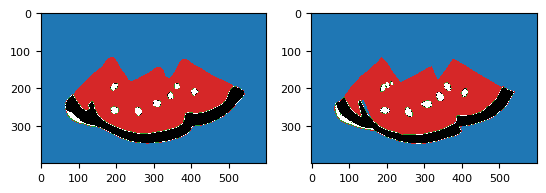

In [ ]:
import cv2
img_name = 'depositphotos_204189678-stock-photo-slice-watermelon-white-background'
val_single_path = f'/content/Watermelon87_Semantic_Seg_Mask/img_dir/val/{img_name}.jpg'
val_mask_path = f'/content/Watermelon87_Semantic_Seg_Mask/ann_dir/val/{img_name}.png'
img = cv2.imread(val_single_path)
result = inference_model(model, img)
pred_mask = result.pred_sem_seg.data[0].cpu().numpy()
plt.subplot(1,2,1)
plt.imshow(pred_mask,cmap=watermalon_cmap)

label = cv2.imread(val_mask_path)
label_mask = label[:,:,0]
label_mask.shape
plt.subplot(1,2,2)
plt.imshow(label_mask,cmap=watermalon_cmap)

In [ ]:
# 真实为前景，预测为前景
TP = (label_mask == 1) & (pred_mask==1)
# 真实为背景，预测为背景
TN = (label_mask == 0) & (pred_mask==0)
# 真实为前景，预测为背景
FN = (label_mask == 1) & (pred_mask==0)
# 真实为背景，预测为前景
FP = (label_mask == 0) & (pred_mask==1)

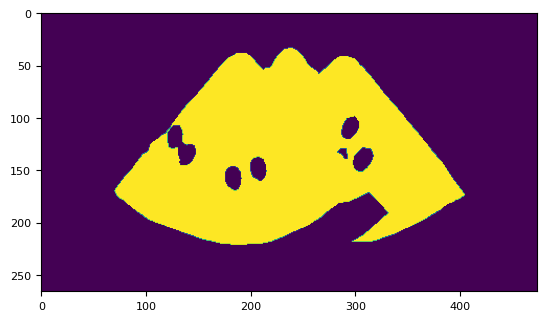

In [ ]:
plt.imshow(TP)
plt.show()

In [ ]:
confusion_map = TP * 255 + FP * 150 + FN * 80 + TN * 30

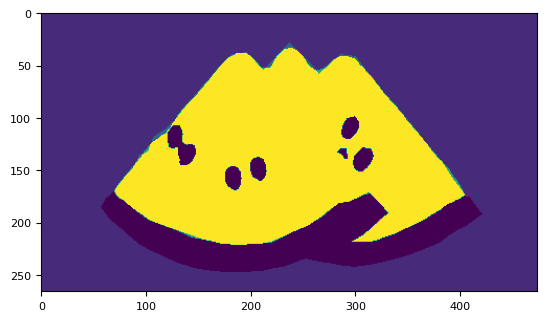

In [ ]:
plt.imshow(confusion_map)
plt.show()

**混淆矩阵**

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix_model = confusion_matrix(label_mask.flatten(), pred_mask.flatten())
confusion_matrix_model

array([[74611,   185,     0,   111,     0],
       [  326, 37624,     0,   258,   119],
       [    0,    60,   114,   246,     0],
       [  229,   586,     2,  9981,     0],
       [    0,   340,     0,     0,  1292]])

In [ ]:
import itertools
def cnf_matrix_plotter(cm, classes, cmap=plt.cm.Blues):
    """
    传入混淆矩阵和标签名称列表，绘制混淆矩阵
    """
    plt.figure(figsize=(10, 10))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    # plt.colorbar() # 色条
    tick_marks = np.arange(len(classes))

    plt.title('Confusion Matrix', fontsize=30)
    plt.xlabel('Pred', fontsize=25, c='r')
    plt.ylabel('True', fontsize=25, c='r')
    plt.tick_params(labelsize=16) # 设置类别文字大小
    plt.xticks(tick_marks, classes, rotation=90) # 横轴文字旋转
    plt.yticks(tick_marks, classes)

    # 写数字
    threshold = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > threshold else "black",
                 fontsize=12)

    plt.tight_layout()
    # plt.savefig('混淆矩阵.pdf', dpi=300) # 保存图像
    plt.show()


<Figure size 400x400 with 0 Axes>

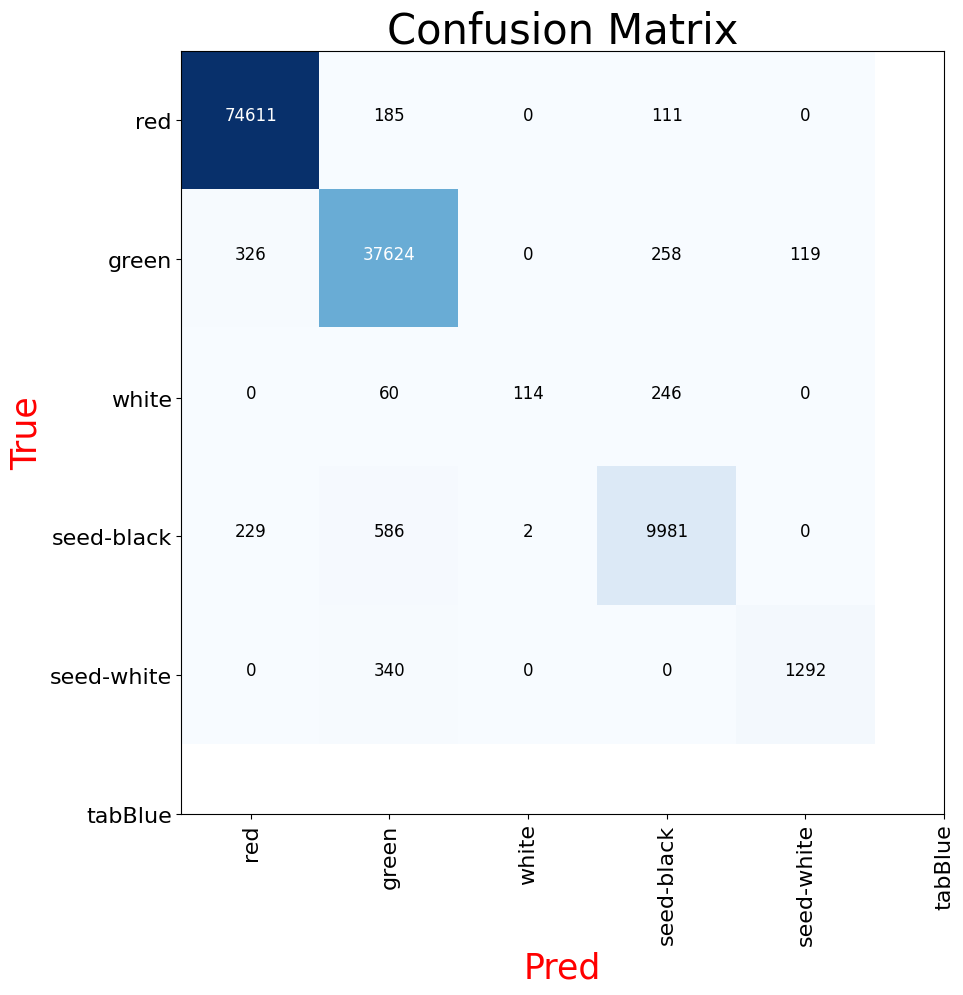

In [ ]:
classes = ['red', 'green', 'white','seed-black', 'seed-white','tabBlue']
plt.figure(figsize=(4,4))
cnf_matrix_plotter(confusion_matrix_model, classes, cmap='Blues')

## 3.6 测试集性能评估

精度评估

In [ ]:
runner.test()

/usr/local/lib/python3.10/dist-packages/mmseg/datasets/transforms/loading.py:78: UserWarning: `reduce_zero_label` will be deprecated, if you would like to ignore the zero label, please set `reduce_zero_label=True` when dataset initialized
  warnings.warn('`reduce_zero_label` will be deprecated, '
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:487: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than 

06/18 10:31:13 - mmengine - INFO - Iter(test) [10/11]    eta: 0:00:00  time: 0.1970  data_time: 0.1455  memory: 4449  
06/18 10:31:13 - mmengine - INFO - per class results:
06/18 10:31:13 - mmengine - INFO - 
+------------+-------+-------+
|   Class    |  IoU  |  Acc  |
+------------+-------+-------+
|    red     |  95.5 | 96.73 |
|   green    | 92.21 | 97.51 |
|   white    | 83.76 | 95.16 |
| seed-black | 79.27 | 88.49 |
| seed-white | 48.04 |  58.1 |
|  tabBlue   |  0.0  |  0.0  |
+------------+-------+-------+
06/18 10:31:13 - mmengine - INFO - Iter(test) [11/11]    aAcc: 95.8700  mIoU: 66.4600  mAcc: 72.6600  data_time: 0.1341  time: 0.1852


{'aAcc': 95.87, 'mIoU': 66.46, 'mAcc': 72.66}

下面两个命令行执行，都会报错：`KeyError: "class `TestLoop` in mmengine/runner/loops.py: 'WatermelonDataset is not in the dataset registry. Please check whether the value of `WatermelonDataset` is correct or it was registered as expected. More details can be found at https://mmengine.readthedocs.io/en/latest/advanced_tutorials/config.html#import-the-custom-module'"
`

所以这个注册类，和运行时的MMSegmentation环境很相关

In [25]:
from mmengine.runner import Runner
from mmseg.utils import register_all_modules

# register all modules in mmseg into the registries
# do not init the default scope here because it will be init in the runner
register_all_modules(init_default_scope=False)

In [ ]:
!python /content/mmsegmentation/tools/test.py \
/content/drive/MyDrive/OpenMMLab/Exercise_4/pspnet-watermelon_20230618.py\
/content/drive/MyDrive/OpenMMLab/workdir/PSPNet/iter_1000.pth\
--work-dir /content/drive/MyDrive/OpenMMLab/workdir/PSPNet

速度评估

In [ ]:
!python /content/mmsegmentation/tools/analysis_tools/benchmark.py \
/content/drive/MyDrive/OpenMMLab/Exercise_4/pspnet-watermelon_20230618.py\
/content/drive/MyDrive/OpenMMLab/workdir/PSPNet/iter_1000.pth\
--work-dir /content/drive/MyDrive/OpenMMLab/workdir/PSPNet